In [1]:
import numpy as np
import keras
import os
import cv2
from keras.models import load_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
letters = { 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j',
11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't',
21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [3]:
model = load_model('../Model/cnn_model.h5')

W1118 23:35:41.884706 139889621071616 deprecation_wrapper.py:119] From /home/atif/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1118 23:35:41.907952 139889621071616 deprecation_wrapper.py:119] From /home/atif/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1118 23:35:41.952633 139889621071616 deprecation_wrapper.py:119] From /home/atif/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1118 23:35:41.955918 139889621071616 deprecation_wrapper.py:119] From /home/atif/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1118 23:35:41

kqkzy


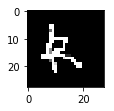

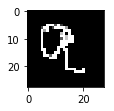

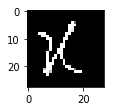

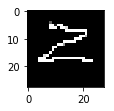

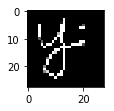

In [4]:
word = ''
kernel = np.ones((3, 3), np.uint8)
for i,item in enumerate(sorted(os.listdir('../temp_data/alphabets/'))):
    plt.figure(figsize=(8,8))
    ax = plt.subplot(1, len(os.listdir('../temp_data/alphabets/')), i+1)
    img = cv2.imread('../temp_data/alphabets/'+item)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.bitwise_not(img)

    retval, img = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

    h,w = img.shape
    img = np.pad(img, pad_width=100, mode='constant', constant_values=0)
    #img = cv2.dilate(img,kernel,iterations = 2)
    if(h>w):
        img = img[50:150+h,50:150+h]
    else:
        img = img[50:150+w,50:150+w]

    img = cv2.dilate(img, kernel, iterations=2)
    img = cv2.resize(img,(28,28))
    img = img.astype('float32')/255

    plt.imshow(img,cmap = 'gray')

    prediction = model.predict(img.reshape(1,28,28,1))[0]
    prediction = np.argmax(prediction)
    word+=str(letters[int(prediction)+1])
print(word)

In [ ]:
plt.subplot()